In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['gender'].value_counts()
df['smoking_history'].value_counts()
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
diabetes_prop = df['diabetes'].value_counts(normalize=True) * 100
diabetes_prop

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

In [9]:
df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()

,age,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,
0,40.115187,26.887163,5.396761,132.852470
1,60.946588,31.988382,6.934953,194.094706


In [10]:
pd.crosstab(df['smoking_history'], df['diabetes'], normalize='index') * 100

diabetes,0,1
smoking_history,,
No Info,95.940362,4.059638
current,89.791083,10.208917
ever,88.211788,11.788212
former,82.998289,17.001711
never,90.465878,9.534122
not current,89.297348,10.702652


In [11]:
pd.crosstab(df['hypertension'], df['diabetes'], normalize='index') * 100

diabetes,0,1
hypertension,,
0,93.069232,6.930768
1,72.104208,27.895792


In [12]:
pd.crosstab(df['heart_disease'], df['diabetes'], normalize='index') * 100

diabetes,0,1
heart_disease,,
0,92.470174,7.529826
1,67.858955,32.141045


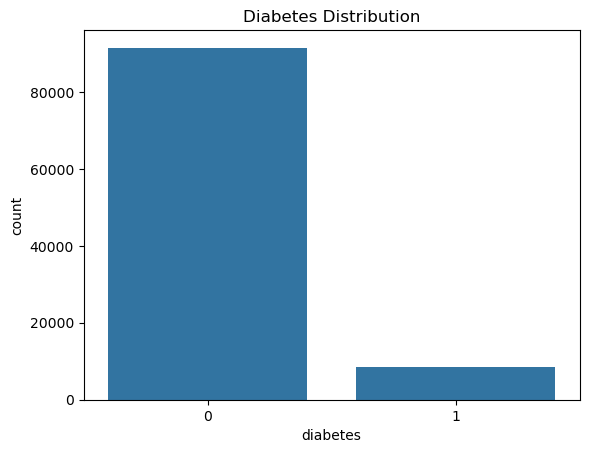

In [14]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Distribution")
plt.show()

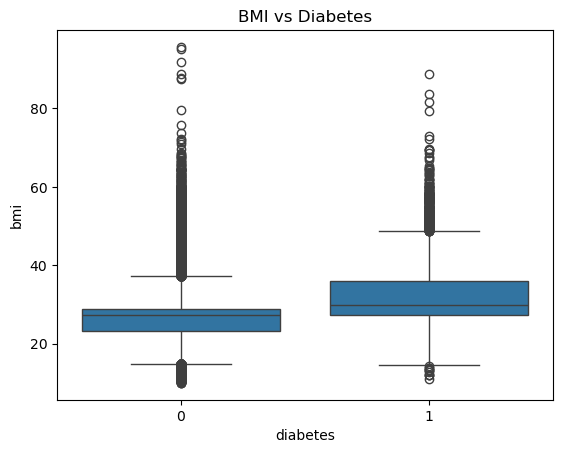

In [15]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title("BMI vs Diabetes")
plt.show()

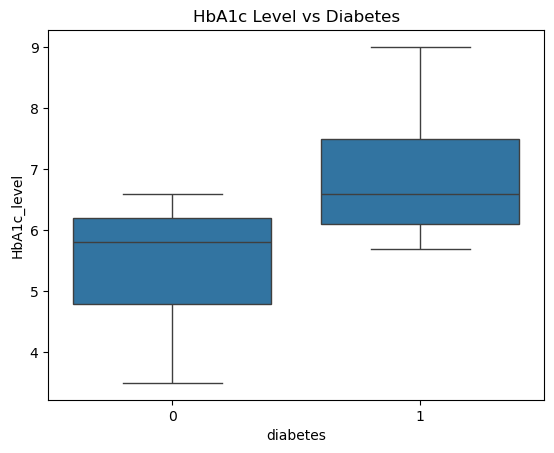

In [16]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title("HbA1c Level vs Diabetes")
plt.show()

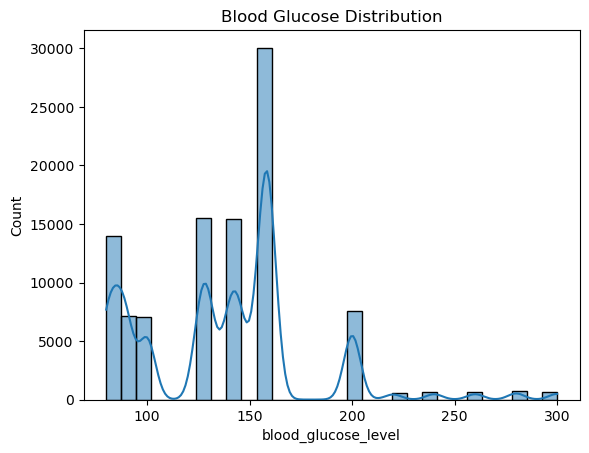

In [17]:
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title("Blood Glucose Distribution")
plt.show()

In [ ]:
Insights:
Diabetic patients show significantly higher HbA1c and blood glucose levels.
Higher BMI and age are strongly associated with diabetes.
Diabetes prevalence is higher among patients with hypertension and heart disease.